In [ ]:
# 参考） [Python]NetworkXでQiitaのタグ関係図を描く｜https://qiita.com/inoory/items/088f719f2fd9a2ea4ee5

In [3]:
import requests
import json

items = []
params = {"page":1, "per_page":100}
for i in range(60):
    print("fetching... page " + str(i+1))
    params["page"] = i + 1
    res = requests.get("https://qiita.com/api/v2/items", params=params)
    items.extend(json.loads(res.text))

fetching... page 1
fetching... page 2
fetching... page 3
fetching... page 4
fetching... page 5
fetching... page 6
fetching... page 7
fetching... page 8
fetching... page 9
fetching... page 10
fetching... page 11
fetching... page 12
fetching... page 13
fetching... page 14
fetching... page 15
fetching... page 16
fetching... page 17
fetching... page 18
fetching... page 19
fetching... page 20
fetching... page 21
fetching... page 22
fetching... page 23
fetching... page 24
fetching... page 25
fetching... page 26
fetching... page 27
fetching... page 28
fetching... page 29
fetching... page 30
fetching... page 31
fetching... page 32
fetching... page 33
fetching... page 34
fetching... page 35
fetching... page 36
fetching... page 37
fetching... page 38
fetching... page 39
fetching... page 40


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
tags_list = []
for item in items:
    tags = [tag["name"] for tag in item["tags"]]
    tags_list.append(tags)

TypeError: string indices must be integers

In [3]:
import collections
import itertools

tag_count = collections.Counter(itertools.chain.from_iterable(tags_list)).most_common(50)

In [4]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([(tag, {"count":count}) for tag,count in tag_count])

In [10]:
for tags in tags_list:
    for node0,node1 in itertools.combinations(tags, 2):
        if not G.has_node(node0) or not G.has_node(node1):
            continue
        if G.has_edge(node0, node1):
            G.edges[node0, node1]["weight"] += 1
        else:
            G.add_edge(node0, node1, weight = 1)

In [11]:
#%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)

plt.axis("off")
plt.savefig("default.png")
plt.show()

<Figure size 1500x1500 with 1 Axes>

In [22]:
for (u,v,d) in list(G.edges(data=True)):
    if d["weight"] <= 4:
        G.remove_edges(u, v)

In [23]:
pos = nx.spring_layout(G, k=0.3)

In [4]:
node_size = [ d["count"]*20 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color="w",alpha=0.6, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="URW Gothic", font_weight="bold")

NameError: name 'G' is not defined

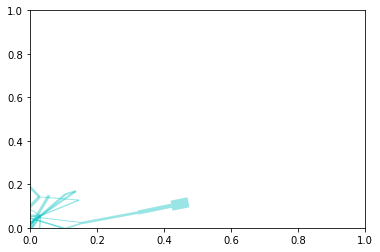

In [25]:
edge_width = [ d["weight"]*0.2 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="c", width=edge_width)

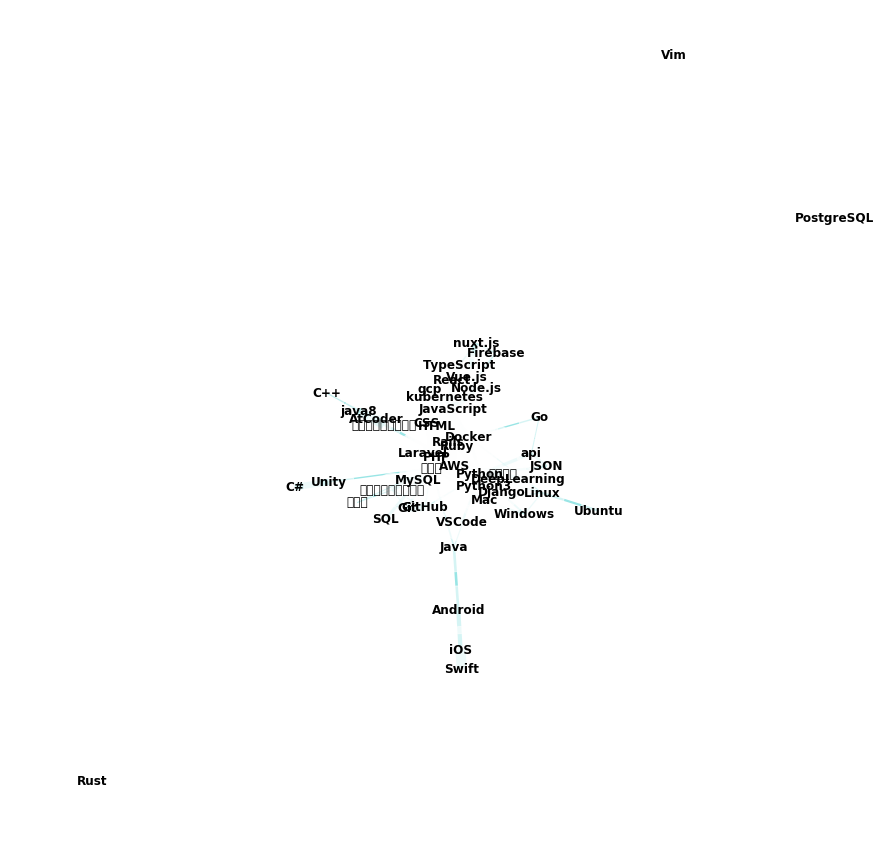

In [26]:
import matplotlib.pyplot as plt
import math

for (u,v,d) in G.edges(data=True):
    if d["weight"] <= 4:
        G.remove_edge(u, v)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.3)

node_size = [ d['count']*20 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='w',alpha=0.6, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="Yu Gothic", font_weight="bold")

edge_width = [ d['weight']*0.2 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='C', width=edge_width)

plt.axis('off')
plt.savefig("g2.png")
plt.show()